In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# 1.a
def gradient_descent(gradient,init_,learn_rate,n_iter=50,tol=1e-06):
    x = init_
    for init_ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta)<=tol):
            break
        x+=delta
    return round(x*1000)/1000

In [3]:
gradient_descent(gradient=lambda v: 2* v + 3 , init_=4.0, learn_rate=0.2)

-1.5

In [4]:
gradient_descent(gradient=lambda v: 2*v**3 - 3*v + 1 , init_=0.1, learn_rate=0.06)

-1.366

1.b<br>for linear regression we find the loss function using mean squared error(MSE)
here x and y and input parameters and and we find the partial derivative with respect to slope(a) and bias(b) for y = ax+b to get the gradient, here $\overline{y_i}$ is the predicted value and $y_i$ is the actual value
\begin{align*}
\textbf{E}&=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\overline{y_i})^2\\
\textbf{E} &= \frac{1}{n}\sum\limits_{i=1}^{n}(y_i-(ax_i + b))^2\\
\frac{\partial E}{\partial a}&=\frac{-2}{N}\sum\limits_{i=1}^{N}x_i(y_i-(ax_i+b))\\
\frac{\partial E}{\partial b}&=\frac{-2}{N}\sum\limits_{i=1}^{N}(y_i-(ax_i+b))\\
\end{align*}

below gradient function will take three parameters X,y and pred_y  where X is the  value with which we will calculate the predicted value of y which is $\overline{y}$, and y is the actual value,pred_y is the predicted value of y which is $\overline{y_i}=ax_i + b$

In [5]:
def gradient(X, y,pred_y):
    #here X and y are the inputs and the pred_y is the predicted value for y
    n=len(X) #total number of elements in X
    grad_a = -(2/n) * sum(X * (y - pred_y)) #derivative of the loss function with respect to a
                                            #  y-pred_y will be an array and then multiplied component wise with array X 
                                            #and then summed similarly below
    grad_b = -(2/n) * sum(y - pred_y) #derivative of the loss function with respect to b
    return grad_a, grad_b

In [6]:
np.random.seed(0)
X=2.5*np.random.randn(10000)+1.5
res=1.5*np.random.randn(10000)
y=2+0.3*X+res

In [7]:
#1.c
def grad_desc(X,y):
    n=float(len(X))
    a=0 #initial value of parameter a in y=ax+b is kept zero
    b=0 #initial value of parameter b in y=ax+b is kept zero
    l=0.001 
    count=10500
    '''
        for this learning rate l the number of iterations count is kept 21500, 
        after running it we will see that at minima, 
        the cost value will not reduce much,giving the expected values of parameters a and b
    '''    
    for i in range(count):
        y_pred = a*X + b # this is the predicted value of y
#         cost = (1/n) * sum([val**2 for val in (y-y_pred)])
        '''
        here cost is the mean square error,
        which is just the sum of squares of the (y-y_pred) values
        '''
        grad_a,grad_b = gradient(X,y,y_pred) # here we will get the partial derivatives w.r.t to a and b which is the direction
        a-=grad_a*l 
        b-=grad_b*l
        '''
        here we are updating the values a and b ,
        this update changes the value of a and b on the curve with respect to the slope from the previous step,
        and when the minima is attained they will reduce much and get stuck on a particular value
        '''
#         print('a {} , b {}, cost {}, iteration {}'.format(a,b,cost,i)) # this is to fine tune the parameters l and count
    return a,b # this will return the a and b values which give the least error and fit the data well

In [8]:
%%time
grad_desc(X,y)

Wall time: 15.9 s


(0.29531861789670527, 2.023287961712447)

In [9]:
#1.d
#this function takes 3 parameters inputs X and y and batch size
def minibatchgradientdescent(X,y,batch):
    a=0 #initial value of parameter a
    b=0 #initial value of parameter b
    l=0.001 # this is learning rate which controls how much the parameters a and b change
    count=10500 # number of times our loop will run
    for i in range(count):
        idx=np.random.randint(0,len(X),batch) # here we are sampling a mini-batch of size batch
        x_batch = X[idx] # idx is the random indexes of size batch with which we sample x_batch and y_batch
        y_batch = y[idx] # x_batch and y_batch will be an array of random batch size
        y_pred = a*x_batch + b # this is the predicted value of y using the y_batch
        error = (1/batch) * sum([val**2 for val in (y_batch-y_pred)])
        grad_a,grad_b= gradient(x_batch,y_batch,y_pred) # here we are calculating the gradients 
                                                        # with respect to the sampled x_batch and y_batch
        a-=grad_a*l # here a and b gets updates according to the slope found from the previous step 
        b-=grad_b*l # when minima is attained they stop changing
    return a,b,error # this returns the expected values of a and b which helps in fitting the data

In [10]:
%%time
minibatchgradientdescent(X,y,32)

Wall time: 429 ms


(0.3052155335220458, 2.014733929387673, 2.2348251092648814)

In [11]:
arr_size = len(X)

In [17]:
#1 e part 1
#sgd will take three parameters the input X and y with size(how many datapoints to choose)
def SGD(X,y,size):
    a=0
    b=0
    l=0.001
    count=10500
    for i in range(count):
        idx = np.random.randint(arr_size)#idx will have only 
                                        # one index chosen randomly between 
                                        # 0 and len(X)-1 so x_sample and 
                                        # y_sample below would only have one data point
        x_sample = X[idx] 
        y_sample = y[idx]
        y_pred = a*x_sample + b # predicted value of y
        grad_a = (-2/size) * (x_sample*(y_sample - y_pred))
        grad_b = (-2/size) * (y_sample - y_pred)
        a = a-grad_a*l #updation of model parameters according to the slope found in the above step
        b = b-grad_b*l
    return a,b # will return a,b which helps fit the data 

In [18]:
%%time
SGD(X,y,1)

Wall time: 46 ms


(0.37082468353723386, 1.9934367480646797)

we can see that for the same initial values of parameter a,b,learning rate and iterations count stochastic Gradient descent performs better in terms of time than vanilla gradient descent because SGD picks up only one data point and finds the gradient with it taking lesser time than GD who takes every datapoint, the execution time of GD and SGD varies a lot,if we lower the iteration count time would be reduced but the model parameters a and b will be calulcated with less accuracy

1e part2<br>
the optimal minibatch size should be the size which gives us the  values which are close to the expected values of parameters a and b which (a,b) ~ (0.3,2) which we can find out by getting all the a , b values for all possible batch sizes and checking the batch size which gives the lowest error we will start from 2 and the maximum we can go till len(X) , excluding it because if we take the whole data set then it is no longer mini-batch gradient descent

In [19]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

In [21]:
%%time
error_values = []
batch_values = []
size = len(X)
batch = 2
while(batch <= size):
    a,b,error = minibatchgradientdescent(X,y,batch)
    error_values.append(error)
    batch_values.append(batch)
    batch*=2

Wall time: 1min 22s


optimal batch size is : 8 having error of : 1.3776542226120672


Text(0, 0.5, 'error')

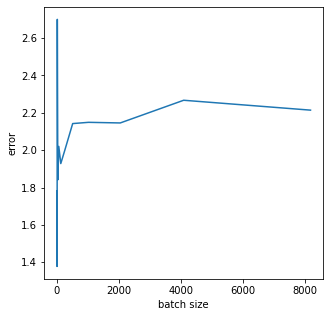

In [22]:
minpos = error_values.index(min(error_values))
print('optimal batch size is : {} having error of : {}'.format(batch_values[minpos],error_values[minpos])) 
plt.plot(batch_values,error_values)
plt.xlabel('batch size')
plt.ylabel('error')